In [16]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 10)

In [43]:
def linreg(x, y):
    # yhat = a*X + b
    denominator = np.dot(x, x) - x.sum()*x.mean()
    a = ( np.dot(x, y) - y.sum()*x.mean() ) / denominator
    b = ( y.mean()*np.dot(x, x) - np.dot(x, y)*x.mean() ) / denominator
    
    # prediction
    yhat = a*x + b
    
    plt.scatter(x, y)
    plt.plot(x, yhat, 'c')
    
    return yhat

def r2(x, y):
    yhat = linreg(x, y)
    
    d_yhat = np.dot((y - yhat), (y - yhat))
    d_mean = np.dot((y - y.mean()), (y - y.mean()))
    
    return 1 - (d_yhat/d_mean)

In [17]:
file = '../../../machine_learning_examples/linear_regression_class/moore.csv'

In [33]:
X, Y = [], []
for line in open(file):
    s = line.split('\t')
    x = int(re.findall('(\d+)', s[2])[0])
    y = int(re.findall('(\d+)', s[1].replace(",",""))[0])
    X.append(x), Y.append(y)
X, Y = np.array(X), np.array(Y)

0.33375819946741403

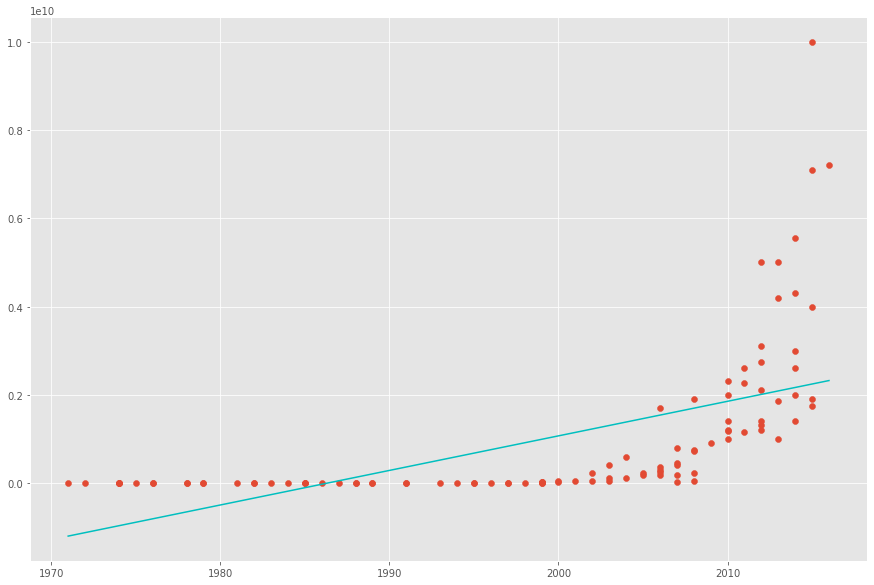

In [45]:
# predicting exponential growth using 1d linreg doesn't work:
r2(X, Y)

### Solution: take log of Y

In [37]:
Ylog = np.log(Y)

0.952944285228576

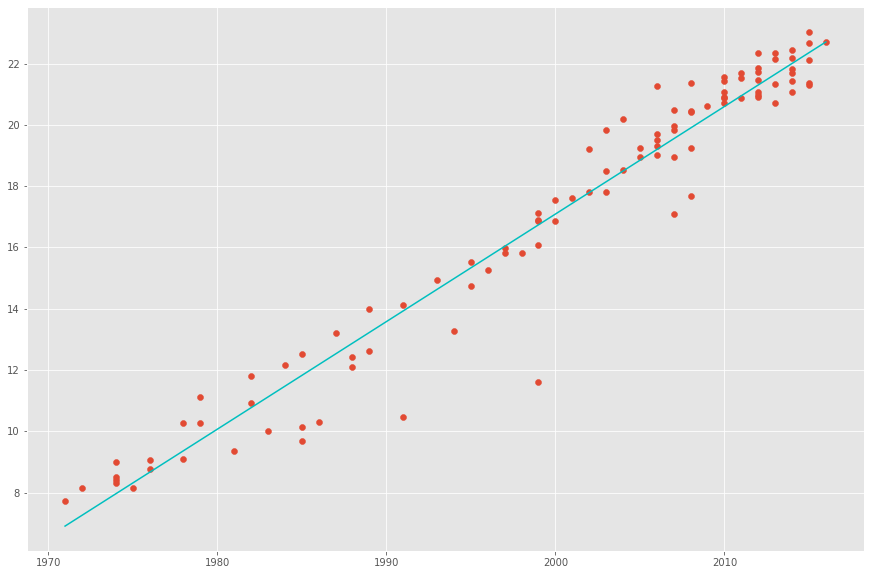

In [44]:
r2(X, Ylog)